<a href="https://colab.research.google.com/github/ricardoestevez/datascience/blob/master/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Random Forest
---

Para iniciar a conversa sobre Florestas Aleatórias, dois conceitos são necessários serem vistos previamente:


1.   Árvores de Decisão
2.   Técnica de Ensemble


###Árvore de Decisão



Pode ser vista de forma simples como um _If-Else_ usado de modo a criar ramos de decisão a partir de valores possíveis dentro do conjunto de dados. Geralmente a explicação da construção de uma árvore é vista como:

- Folhas: Resposta final na decisão
- Ramos: Corresponde a um valor de atributo
- Nó: Testa um atributo

 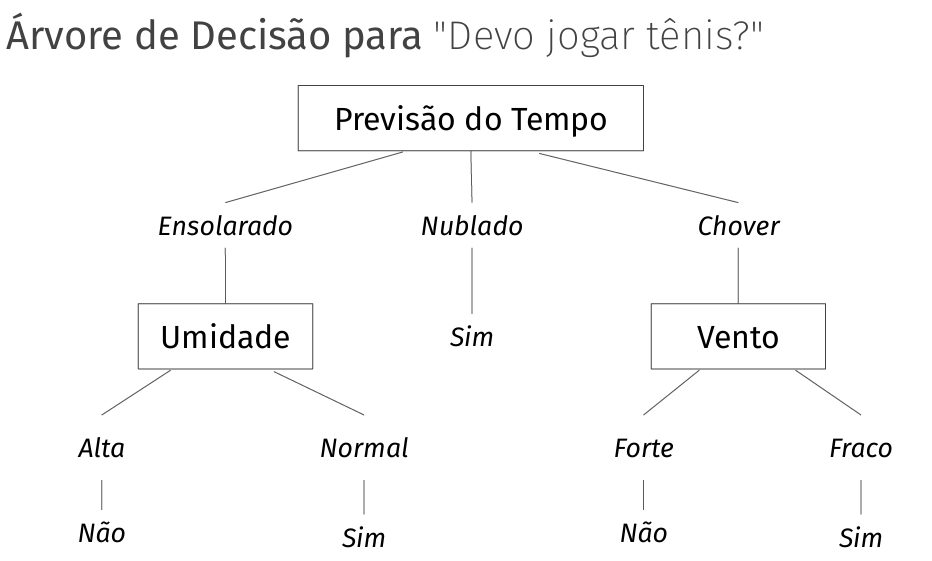


#### Principais Vantagens e Desvantagens da Árvore de Decisão

Adiantando, uma floresta aleatória (Random Forest) nada mais é do que um conjunto de Árvores de Decisão, desse modo é importante primeiro entender quais vantagens e desvantagem desse modelo.

**Vantagens**
- Facilidade na explicabilidade e interpretação do resultado devido sua lógica de escolha.
- Pouco pré processamento: Não possui necessidade de padronização dos dados ou normalização, lidando bem com variaveis categóricas.
- Funciona com bem com ruído dos dados.
- Modelo rápido para treinamento (em árvores não muito extensas).

**Desvantagens**

- Caso árvore fique muito extensa perde a facilidade na interpretação.
- Árvores grandes tendem a _Overfitting_
- Pouco instável, podendo gerar um modelo diferente com pouca mudança nos dados.

### Técnica de Ensemble

Ensemble consiste em combinar múltiplos algoritmos a fim de obter um melhor desempenho preditivo do que obtido de forma individual em cada um deles.

Alguns tipos de Ensemble são:
1. *Bagging:* Treinamento de modelos iguais, cada um com uma amostra diferente (com ou sem reposição). **Visando reduzir variância e overfitting.**
2. *Boosting:* Treina modelos de forma sequêncial com o seguinte tentando melhorar o resultado do anterior. **Visando reduzir viés.**
3. *Stacking:* Treina diferentes e cria um meta-modelo combinando as previsões. **Busca melhorar performance.**

### Random Forest

De fato chegando ao modelo Random Forest, ele consiste na aplicação de Ensemble (geralmente bagging) de _n_ árvores de decisão cada uma treinada com um subconjunto de dados com ou sem reposição. Para escolher o resultado final usa-se a resposta majoritária dentre todas as árvores.


Os hiperparametros utilizados na construção de uma floresta aleatória são:

- *n_estimators* define o número de árvores que compõe a floresta.
- *max_features* número máximo de atributos para determinar a separação de cada nó.
- *max_depth* controla a profundidade permitida para cada árvore, esse controle pode previnir overfitting.
- *min_samples_split* mínimo de amostras para dividir um nó, números altos reduz complexidade da árvore.
- *min_samples_leaf*  mínimo de amostras nas folhas, evitando grupos pequenos.
- *bootstap* indica se a seleção dos conjuntos de dados serão com ou sem reposição.


#### Principais Vantagens e Desvantagens Random Forest

Dado que este modelo é uma evolução da árvore de decisão, com aplicação de diversas árvores, alguns problemas encontrados anteriormente são solucionados ao passo que outros aparecem.

**Vantagens**
- Reduz overfitting drasticamente.
- Maior estabilidade no modelo, não sofrendo alterações com pequenas mudanças.
- Pouco pré processamento: Não possui necessidade de padronização dos dados ou normalização, lidando bem com variaveis categóricas.
- Bom resultado de baseline, geralmente é um bom modelo de inicio sem necessidade de ajustes finos.

**Desvantagens**

- Baixa explicabilidade, com a criação de diversas árvores torna-se dificil visualizar e explicar cada decisão.
- Modelo mais lento em processamento devido a criação de diversas árvores.
- Exige maior capacidade computacional quanto maior tamanho das árvores e quantidade de árvores.

### Aplicação prática

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import plot_tree
import pandas as pd
import numpy as np

In [2]:
# 1. Carregar Iris
data = load_iris()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

# 2. Separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
# 3. Treinar Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 4. Previsões
y_pred = model.predict(X_test)

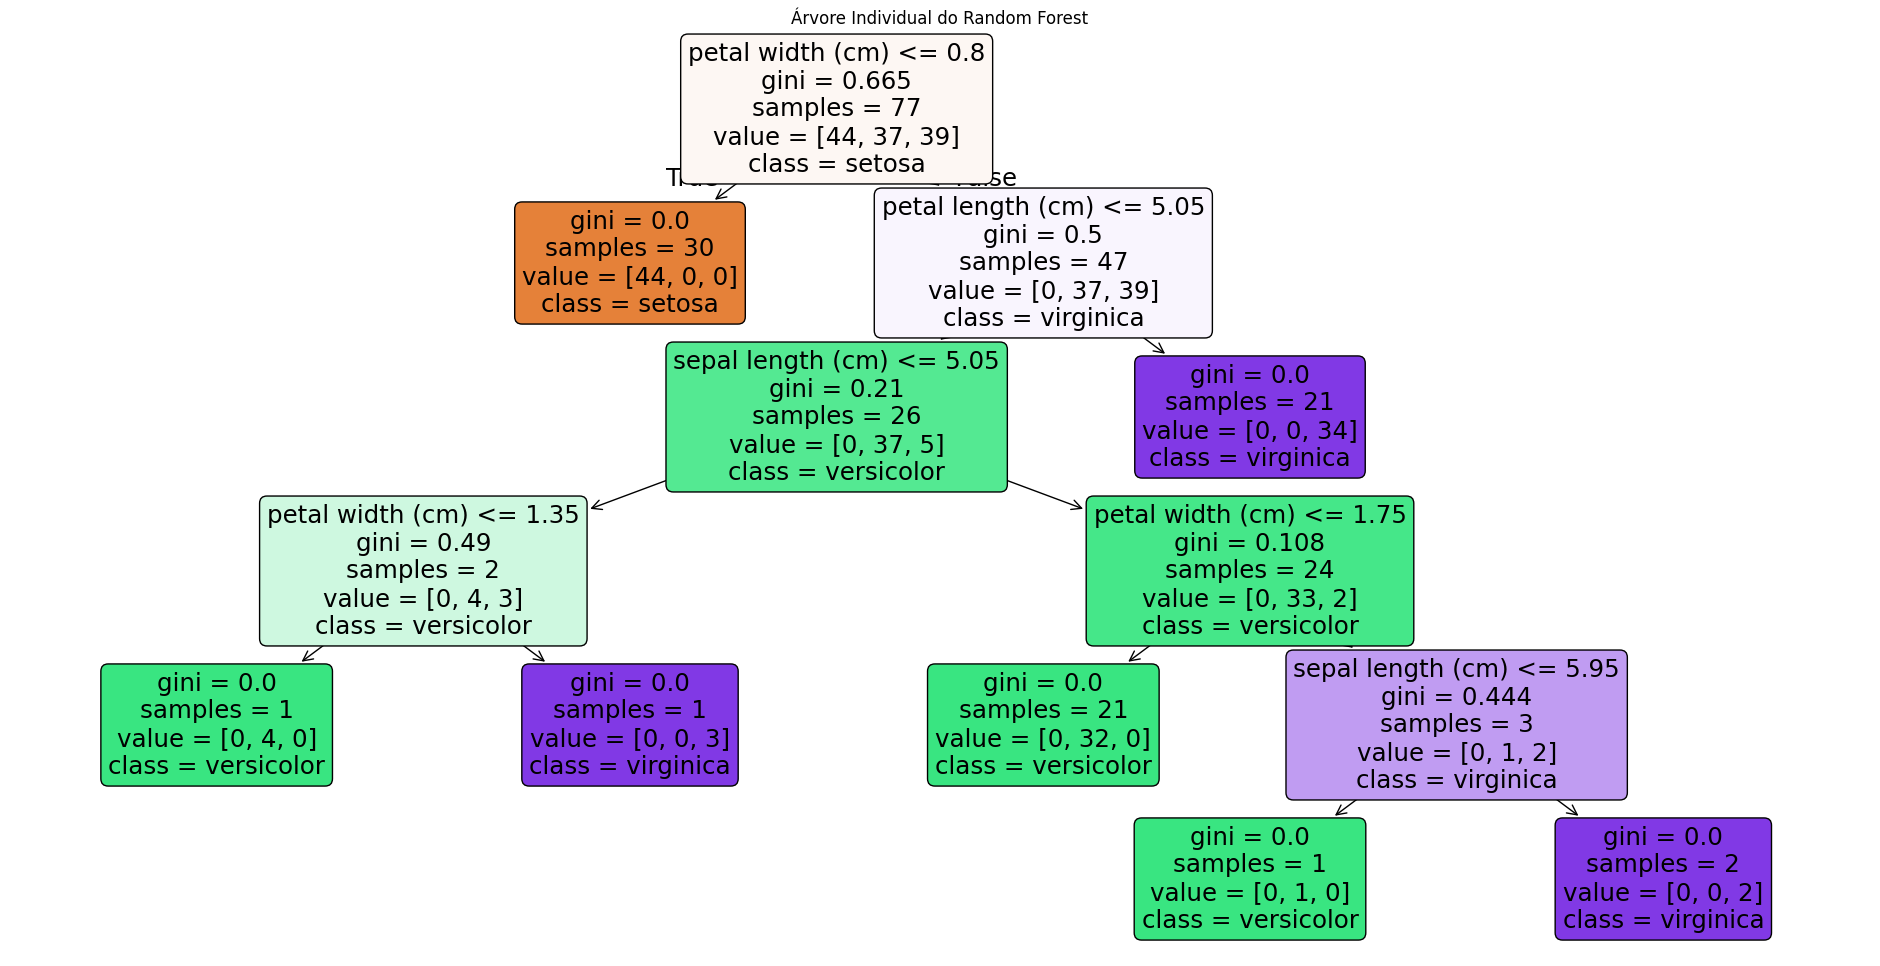

In [8]:
# Pegando a primeira árvore
tree = model.estimators_[5]

plt.figure(figsize=(24, 12))
plot_tree(
    tree,
    feature_names=feature_names,
    class_names=target_names,
    filled=True,
    rounded=True
)
plt.title("Árvore Individual do Random Forest")
plt.show()

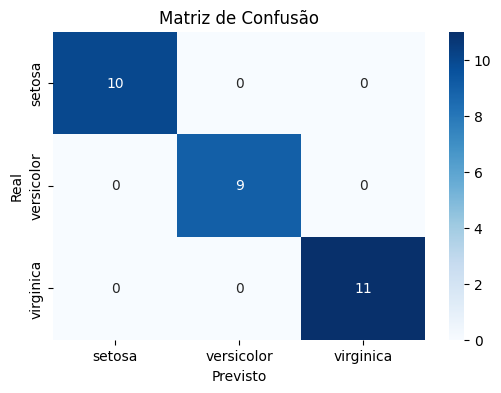

In [5]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=target_names, yticklabels=target_names)
plt.title("Matriz de Confusão")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

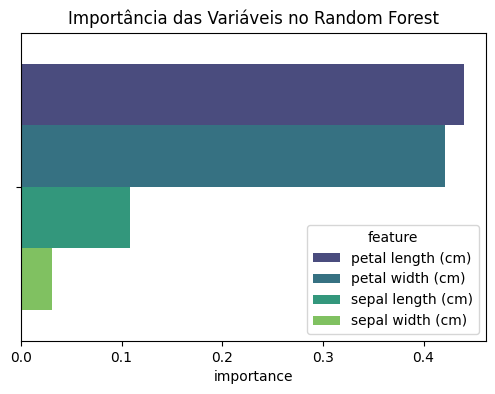

In [6]:
# Importância das Features
importances = model.feature_importances_
feat_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values("importance", ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(data=feat_df, x="importance", hue="feature", palette="viridis")
plt.title("Importância das Variáveis no Random Forest")
plt.show()

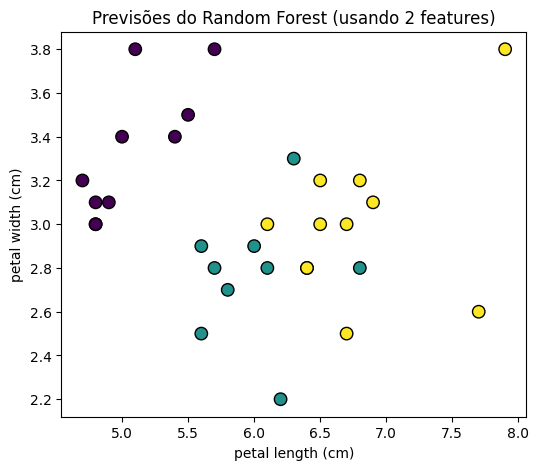

In [7]:
# Scatter plot com previsões
plt.figure(figsize=(6,5))
plt.scatter(
    X_test[:, 0], X_test[:, 1],
    c=y_pred, cmap="viridis", s=80, edgecolor="k"
)
plt.title("Previsões do Random Forest (usando 2 features)")
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.show()
